In [1]:
from pyomo.environ import *
import matplotlib.pyplot as plt
import numpy as np
import random

In [5]:
model   = AbstractModel()
model.N = Param(mutable=True, initialize=40)
model.i = RangeSet(model.N)
model.j = Set(initialize=model.i)
model.R = Var(bounds=(0.001,2), within=NonNegativeReals, initialize=random.uniform(0.001,1))
model.x = Var(model.i, bounds=(0.001,2), within=NonNegativeReals, initialize=random.uniform(0.001,2))
model.y = Var(model.i, bounds=(0.001,2), within=NonNegativeReals, initialize=random.uniform(0.001,2))

def rule_eq1(model,i,j):
    if i>j:
        return (model.x[i]-model.x[j])**2+(model.y[i]-model.y[j])**2 >=4*model.R**2
    else:
        return Constraint.Skip;
model.eq1 = Constraint(model.i,model.j,rule=rule_eq1)

def rule_eq2(model,i):
    return (model.x[i]-1)**2+(model.y[i]-1)**2 <=(1-model.R)**2
model.eq2 = Constraint(model.i,rule=rule_eq2)

model.obj = Objective(expr=model.R, sense=maximize)
opt = SolverFactory('Ipopt')

In [3]:
instance = model.create_instance()
results = opt.solve(instance) # solves and updates instance

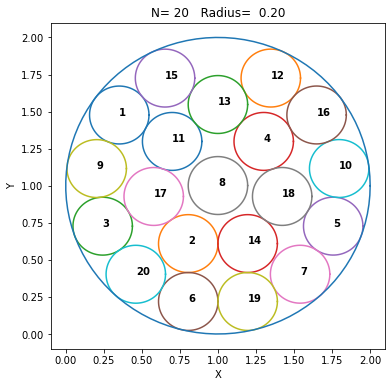

In [4]:
fig = plt.figure(figsize=(6,6))
theta=np.linspace(0,2*np.pi,100)
for i in instance.i:
    Xc=value(instance.x[i])+value(instance.R)*np.cos(theta)
    Yc=value(instance.y[i])+value(instance.R)*np.sin(theta)
    plt.text(value(instance.x[i]),value(instance.y[i]),str(i),fontweight='bold')
    plt.plot(Xc,Yc)

Xc=1+np.cos(theta)
Yc=1+np.sin(theta)
plt.plot(Xc,Yc)
plt.title('N= '+ str(value(instance.N)) +'   Radius= ' + str("%5.2f"% value(instance.R)))
plt.xlabel('X')
plt.ylabel('Y')
plt.show()